# Graded Challenge 7 (Model Inference)
---
Name: Basyira Sabita  
Batch: HCK-012

# Import Libraries

In [1]:
# Import Libraries
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Load Model

In [2]:
model = tf.keras.models.load_model('deployment/base_model.keras')

# Getting Image to Predict

In [3]:
# Loading the files path
inf_files = glob.glob('./inf/*')

inf_df = pd.DataFrame({
    'images': inf_files
})

inf_df

,images
0,./inf/lotus_inf.jpeg
1,./inf/orchid_inf.jpeg
2,./inf/tulip1_inf.jpeg
3,./inf/sunflower_inf.jpg
4,./inf/lily_inf.jpg
5,./inf/tulip_inf.jpeg


In [4]:
# Inference Image Data Generator
inf_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.)

# Flow from dataframe
inf_gen = inf_datagen.flow_from_dataframe(
	inf_df,
    x_col='images',
    y_col=None,
	class_mode=None,
	shuffle=False
)

Found 6 validated image filenames.


# Predict the Image

In [5]:
predictions = model.predict(inf_gen)

predictions

1/1 [==============================] - 0s 238ms/step


array([[1.2976772e-02, 9.8701465e-01, 2.2383125e-07, 5.5714900e-13,
        8.3706900e-06],
       [1.6073853e-03, 7.1813335e-04, 9.9735993e-01, 4.1355065e-06,
        3.1028714e-04],
       [3.9799306e-01, 9.0605013e-02, 2.5749075e-01, 7.5125612e-02,
        1.7878555e-01],
       [4.2391346e-07, 1.8025911e-09, 1.3670530e-06, 9.9999821e-01,
        4.5471186e-08],
       [6.3934219e-01, 8.5874297e-02, 5.1913206e-02, 8.8898567e-03,
        2.1398045e-01],
       [5.8098374e-07, 8.0110745e-08, 7.5266371e-09, 8.3161291e-09,
        9.9999928e-01]], dtype=float32)

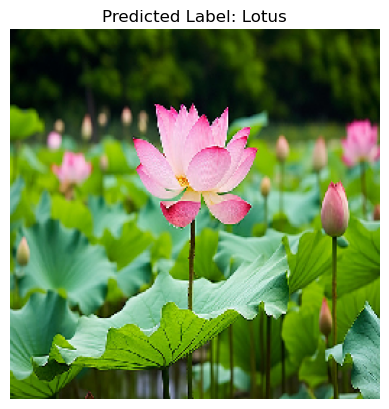

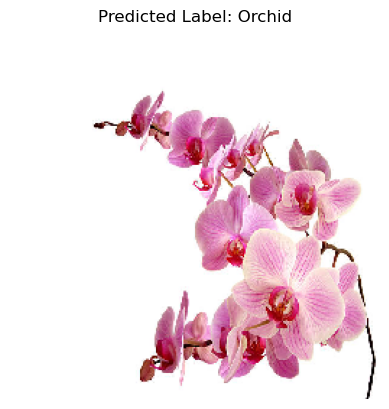

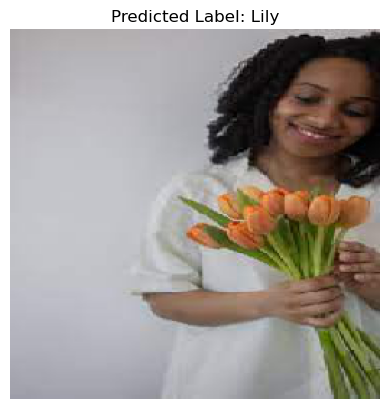

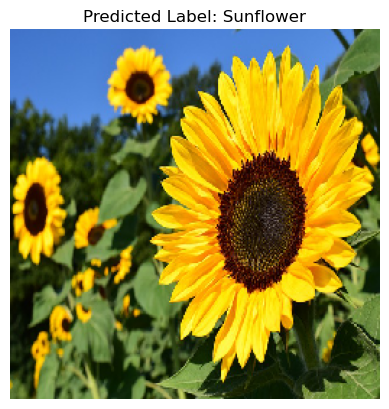

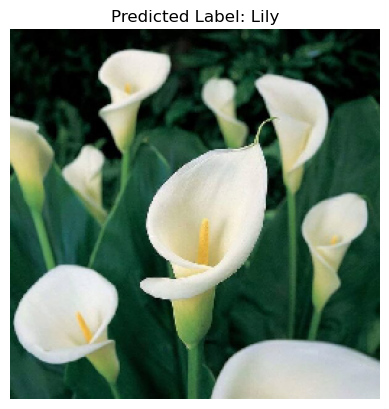

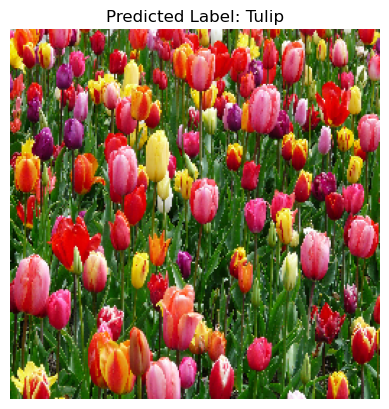

In [6]:
# Convert the predicted probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)
labels = ['Lily', 'Lotus', 'Orchid', 'Sunflower', 'Tulip']

# Display the images along with their predicted labels
for i in range(len(predicted_labels)):
    # Load the image
    img_path = inf_df.iloc[i]['images']
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(256, 256))
    
    # Display the image
    plt.imshow(img)
    plt.axis('off')
    
    # Get the predicted label
    predicted_label = labels[predicted_labels[i]]
    
    # Display the predicted label
    plt.title(f'Predicted Label: {predicted_label}')
    
    # Show the image with the predicted label
    plt.show()

The model has successfully predict inference data. The predictions given by the model are quite good. The incorrect predictions on the inference data are the image where the flower object is not the dominant object (should have been predicted as tulips). Overall, the model is quite good, but there is still room for improvement where the model could predict even more general images.